# Data Project

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [3]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# user written modules
import dataproject

In [4]:
ind = DstApi('STRAFNA3')

In [5]:
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table STRAFNA3: Persons guilty in crimes by sex, age, country of origin and time
Last update: 2023-12-12T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,KOEN,2,M,Men,K,Women,False
1,ALDER,4,TOT,"Age, total",50-79,50-79 years,False
2,IELAND,75,0000,Total,7300,"Other countries, non-western",False
3,Tid,21,2000,2000,2022,2022,True


In [6]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params

{'table': 'strafna3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KOEN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['*']},
  {'code': 'IELAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [7]:
variables = params['variables'] # Returns a view, that we can edit
variables[1]['values'] = ['TOT']
variables[3]['values'] = ['2017', '2018', '2019', '2020', '2021', '2022']
params

{'table': 'strafna3',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'KOEN', 'values': ['*']},
  {'code': 'ALDER', 'values': ['TOT']},
  {'code': 'IELAND', 'values': ['*']},
  {'code': 'Tid', 'values': ['2017', '2018', '2019', '2020', '2021', '2022']}]}

In [13]:
inc_api = ind.get_data(params=params)
inc_api.head(900)

,KOEN,ALDER,IELAND,TID,INDHOLD
0,Women,"Age, total",Yugoslavia,2020,297
1,Women,"Age, total",Poland,2020,507
2,Women,"Age, total",Portugal,2020,17
3,Women,"Age, total",Romania,2020,302
4,Women,"Age, total",Switzerland,2020,14
...,...,...,...,...,...
895,Men,"Age, total",Republic of North Macedonia,2018,200
896,Men,"Age, total","Yugoslavia, Federal Republic",2018,68
897,Men,"Age, total","Other countries, total",2018,1340
898,Men,"Age, total","Other countries, western",2018,88


In [38]:
inc_api.sort_values(by='INDHOLD', inplace=True)
inc_api.tail(20)

,KOEN,ALDER,IELAND,TID,INDHOLD
300,Women,"Age, total",Total,2018,31568
751,Women,"Age, total",Denmark,2021,32458
675,Women,"Age, total",Total,2017,32868
136,Women,"Age, total",Denmark,2020,32874
150,Women,"Age, total",Total,2019,34818
450,Women,"Age, total",Total,2022,38931
750,Women,"Age, total",Total,2021,41140
135,Women,"Age, total",Total,2020,41143
376,Men,"Age, total",Denmark,2018,87452
601,Men,"Age, total",Denmark,2017,89097


In [26]:
inc_api = inc_api[inc_api['IELAND']!='Denmark']
inc_api = inc_api[inc_api['IELAND']!='Total']
inc_api.tail(20)

,KOEN,ALDER,IELAND,TID,INDHOLD
130,Men,"Age, total",Kuwait,2022,232
131,Men,"Age, total",Lebanon,2022,2623
132,Men,"Age, total",Vietnam,2022,271
133,Men,"Age, total",Pakistan,2022,1459
134,Men,"Age, total",Philippines,2022,80
135,Men,"Age, total",Syria,2022,2225
136,Men,"Age, total",Thailand,2022,114
137,Men,"Age, total",Australia,2022,29
138,Men,"Age, total",Estonia,2022,13
139,Men,"Age, total",Latvia,2022,183


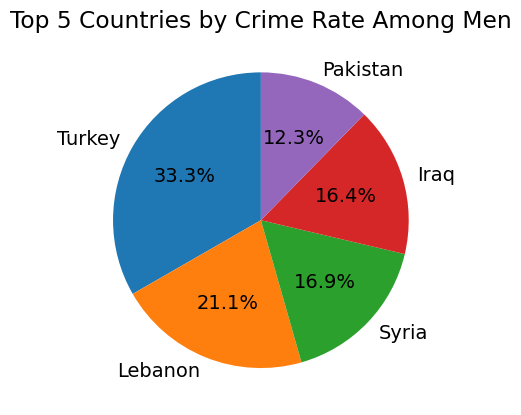

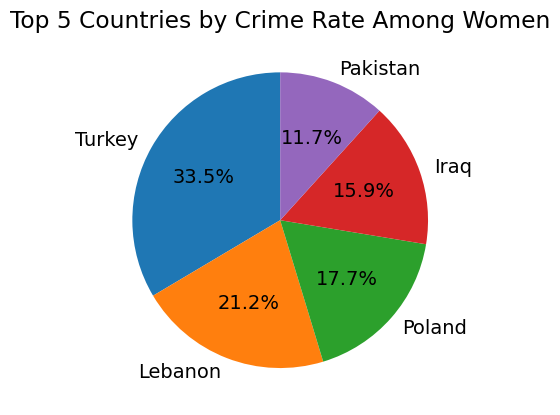

In [40]:
# Filter for men
inc_api_men = inc_api[(inc_api['KOEN'] == 'Men') & (inc_api['IELAND'] != 'Total') & (inc_api['IELAND'] != 'Denmark') & (inc_api['IELAND'] != 'Other countries, non-western') & (inc_api['IELAND'] != 'Other countries, total') & (inc_api['TID'] != '2017') & (inc_api['TID'] != '2018') & (inc_api['TID'] != '2019') & (inc_api['TID'] != '2020') & (inc_api['TID'] != '2021')]

# Sum crimes by country for men, and select the top N countries
top_n_countries_men = inc_api_men.groupby('IELAND')['INDHOLD'].sum().nlargest(5)  # Replace N with the number of countries you wish to display

# Plotting for men
top_n_countries_men.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', title='Top 5 Countries by Crime Rate Among Men')
plt.show()

# Filter for women
inc_api_women = inc_api[(inc_api['KOEN'] == 'Women') & (inc_api['IELAND'] != 'Total') & (inc_api['IELAND'] != 'Denmark') & (inc_api['IELAND'] != 'Other countries, non-western') & (inc_api['IELAND'] != 'Other countries, total') & (inc_api['TID'] != '2017') & (inc_api['TID'] != '2018') & (inc_api['TID'] != '2019') & (inc_api['TID'] != '2020') & (inc_api['TID'] != '2021')]

# Sum crimes by country for women, and select the top N countries
top_n_countries_women = inc_api_women.groupby('IELAND')['INDHOLD'].sum().nlargest(5)  # Replace N with the number of countries you wish to display

# Plotting for women
top_n_countries_women.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', title='Top 5 Countries by Crime Rate Among Women')
plt.show()




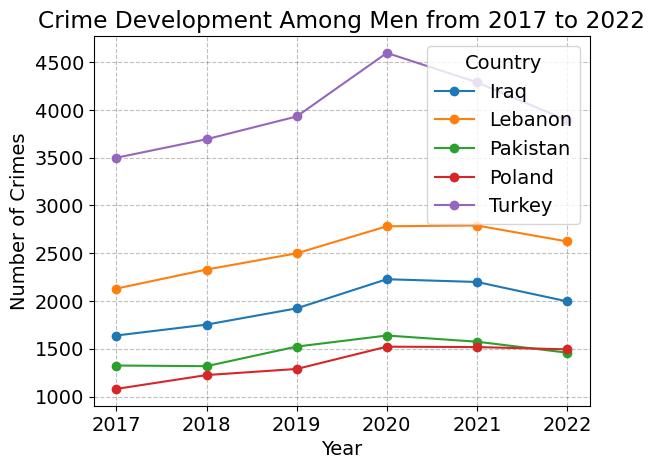

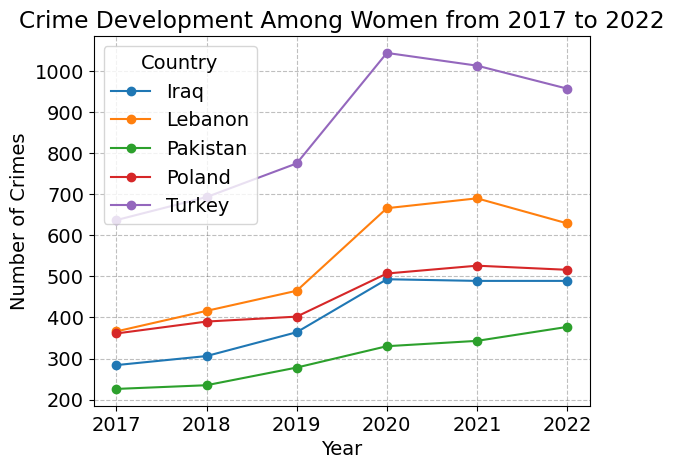

In [43]:
import matplotlib.pyplot as plt

# Assuming 'inc_api' is your DataFrame
# Step 1: Filter by gender and year
filtered_data = inc_api[(inc_api['KOEN'] == 'Men') & (inc_api['TID'].between(2017, 2022))]

# Step 2: Further filter to include only the specified countries
countries = ["Turkey", "Pakistan", "Iraq", "Poland", "Lebanon"]
filtered_data = filtered_data[filtered_data['IELAND'].isin(countries)]

# Step 3: Group by country and year, then sum or average
grouped_data = filtered_data.groupby(['IELAND', 'TID'])['INDHOLD'].sum().unstack()

# Step 4: Plot the data
grouped_data.T.plot(kind='line', marker='o')  # Transpose to have years on the x-axis and countries as lines
plt.title('Crime Development Among Men from 2017 to 2022')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(title='Country')
plt.show()

# Assuming 'inc_api' is your DataFrame
# Step 1: Filter by gender and year
filtered_data = inc_api[(inc_api['KOEN'] == 'Women') & (inc_api['TID'].between(2017, 2022))]

# Step 2: Further filter to include only the specified countries
countries = ["Turkey", "Pakistan", "Iraq", "Poland", "Lebanon"]
filtered_data = filtered_data[filtered_data['IELAND'].isin(countries)]

# Step 3: Group by country and year, then sum or average
grouped_data = filtered_data.groupby(['IELAND', 'TID'])['INDHOLD'].sum().unstack()

# Step 4: Plot the data
grouped_data.T.plot(kind='line', marker='o')  # Transpose to have years on the x-axis and countries as lines
plt.title('Crime Development Among Women from 2017 to 2022')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(title='Country')
plt.show()


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

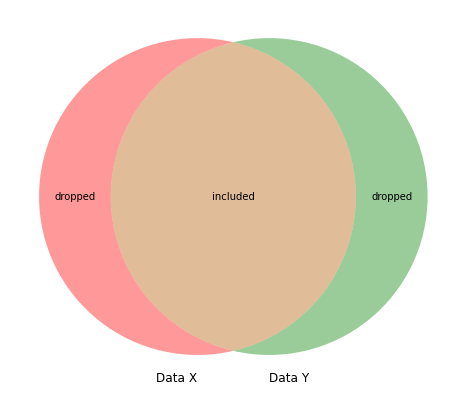

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.